In [34]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import matplotlib.pyplot as plt
from lime import lime_image
from keras.applications.vgg16 import VGG16
from keras.models import load_model

from unboxer.class_heatmap import ClassHeatmap
from unboxer.utils import prep_model_for_vis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
model = VGG16(weights='imagenet', include_top=True)
model.get_layer('predictions').activation

<function keras.activations.softmax>

In [36]:
model = prep_model_for_vis(model)
model.get_layer('predictions').activation

/home/jakub.czakon/.env/dl_py2/local/lib/python2.7/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<function keras.activations.linear>

In [37]:
cam = ClassHeatmap(cam_model=model, img_shape=(224,224))

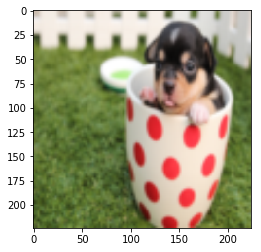

In [38]:
IMG_PATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/data/dogs/input/dog_in_a_mug.png'
img = plt.imread(IMG_PATH)
plt.imshow(img)
plt.show()

In [41]:
cam.plot_cam(img_path=IMG_PATH)

8.54917


interactive(children=(Text(value=u'1', description=u'label_id'), Output()), _dom_classes=('widget-interact',))

<function unboxer.class_heatmap._plot>

In [8]:
cam.plot_saliency(img_path=IMG_PATH)

interactive(children=(Text(value=u'1', description=u'label_id'), Output()), _dom_classes=('widget-interact',))

<function unboxer.class_heatmap._plot>

In [158]:
FACENET_FILEPATH = '/mnt/ml-team/homes/jakub.czakon/.unblackboxing_webinar_data/models/facenet.h5'
model = load_model(FACENET_FILEPATH)
model.get_layer('predictions').activation

<function keras.activations.softmax>

In [159]:
model = prep_model_for_vis(model)
model.get_layer('predictions').activation

<function keras.activations.linear>

In [160]:
cam = ClassHeatmap(cam_model=model, img_shape=(125, 94))

In [161]:
FACE_IMG_PATH = 'resources/tsne_images_folder/images/211.jpg'

In [162]:
cam.plot_cam(img_path=FACE_IMG_PATH, 
             label_list=['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair'])

interactive(children=(Text(value=u'1', description=u'label_id'), Output()), _dom_classes=('widget-interact',))

<function unboxer.class_heatmap._plot>

In [163]:
cam.plot_saliency(img_path=FACE_IMG_PATH, 
             label_list=['Colin Powell', 'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder', 'Tony Blair'])

interactive(children=(Text(value=u'1', description=u'label_id'), Output()), _dom_classes=('widget-interact',))

<function unboxer.class_heatmap._plot>